so 3766 and 3678 are okay and have both temp and percipitation -> two upper regions \n

3667(east) replace:3755 and 3457(west)replace: 3460 only have precipitation

3518: no other station for central area has complete historical data. we have to settle with 3678 for both center and north east


Data  for Canola Stocks is from this url: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3210000701&pickMembers%5B0%5D=1.1&pickMembers%5B1%5D=2.1&cubeTimeFrame.startMonth=08&cubeTimeFrame.startYear=1987&cubeTimeFrame.endMonth=12&cubeTimeFrame.endYear=2022&referencePeriods=19870801%2C20221201

Data for area yielded, seeded, harvested in Canada is from this url: https://open.canada.ca/data/en/dataset/25b1d384-882d-4aef-949c-68e8c038bf8b

In [1]:
!ls

3457                         Untitled.ipynb
3667                         areas-canada
3678                         canada-historical-stocks.csv
3766                         weather.py
Station Inventory EN.csv


data for historical cpi for canada is from this url: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000401&pickMembers%5B0%5D=1.2&cubeTimeFrame.startMonth=01&cubeTimeFrame.startYear=1987&cubeTimeFrame.endMonth=12&cubeTimeFrame.endYear=2022&referencePeriods=19870101%2C20221201

In [1]:
import os
os.chdir("3766")

In [32]:
import pandas as pd

final_df = 0
for i in range(1988,2023):
    df = pd.read_csv("en_climate_daily_MB_5040FJ3_"+str(i)+"_P1D.csv")
    df.drop(['Data Quality','Max Temp Flag','Snow on Grnd (cm)','Snow on Grnd Flag',
            'Total Rain Flag','Total Snow Flag','Total Precip Flag','Heat Deg Days Flag','Cool Deg Days Flag',
            'Dir of Max Gust (10s deg)','Dir of Max Gust Flag','Spd of Max Gust (km/h)',
            'Spd of Max Gust Flag','Min Temp Flag','Mean Temp Flag',
            'Heat Deg Days (°C)','Cool Deg Days (°C)',
            'Longitude (x)','Latitude (y)','Station Name','Climate ID','Day','Mean Temp (°C)'],inplace=True,axis=1)
    
    df.drop('Date/Time',axis=1,inplace=True)
    dates = pd.to_datetime(df.Year*10000+df.Month*100+1,format='%Y%m%d')
    df = pd.concat([df,dates], axis=1)
    df = df.rename(columns={0: 'Date'})
    df.drop(['Year','Month'],axis=1,inplace=True)
    df = df.groupby('Date').mean()
    df['Max Temp (°C)'] = df['Max Temp (°C)'].round(2)
    df['Min Temp (°C)'] = df['Min Temp (°C)'].round(2)
    df['Total Rain (mm)'] = df['Total Rain (mm)'].round(2)
    df['Total Snow (cm)'] = df['Total Snow (cm)'].round(2)
    if i==1988:
        final_df = df
    else:
        final_df = pd.concat([final_df,df], axis=0)
    
final_df


Max Temp (°C)  Min Temp (°C)  Total Rain (mm)  Total Snow (cm)  \
Date                                                                         
1988-01-01         -13.48         -25.85             0.00             0.99   
1988-02-01          -9.28         -23.64             0.00             0.71   
1988-03-01          -0.68         -14.50             0.10             2.82   
1988-04-01           9.35          -4.37             0.23             2.44   
1988-05-01          18.77           3.89             2.89             0.06   
...                   ...            ...              ...              ...   
2022-08-01          27.55          13.23             0.81             0.00   
2022-09-01          21.63           6.00             2.60             0.00   
2022-10-01          11.52           0.45             0.66             0.00   
2022-11-01          -2.03          -9.53             0.00             2.52   
2022-12-01         -13.29         -20.23             0.00             1.37   

            Total Precip (mm)  
Date                           
1988-01-01           0.993548  
1988-02-01           0.710345  
1988-03-01           2.916129  
1988-04-01           2.673333  
1988-05-01           2.954839  
...                       ...  
2022-08-01           0.806452  
2022-09-01           2.600000  
2022-10-01           0.661290  
2022-11-01           2.520000  
2022-12-01           1.374194  

[420 rows x 5 columns]

In [33]:
import os
os.chdir("../3678")

In [34]:
!ls

en_climate_daily_MB_5022791_1988_P1D.csv
en_climate_daily_MB_5022791_1989_P1D.csv
en_climate_daily_MB_5022791_1990_P1D.csv
en_climate_daily_MB_5022791_1991_P1D.csv
en_climate_daily_MB_5022791_1992_P1D.csv
en_climate_daily_MB_5022791_1993_P1D.csv
en_climate_daily_MB_5022791_1994_P1D.csv
en_climate_daily_MB_5022791_1995_P1D.csv
en_climate_daily_MB_5022791_1996_P1D.csv
en_climate_daily_MB_5022791_1997_P1D.csv
en_climate_daily_MB_5022791_1998_P1D.csv
en_climate_daily_MB_5022791_1999_P1D.csv
en_climate_daily_MB_5022791_2000_P1D.csv
en_climate_daily_MB_5022791_2001_P1D.csv
en_climate_daily_MB_5022791_2002_P1D.csv
en_climate_daily_MB_5022791_2003_P1D.csv
en_climate_daily_MB_5022791_2004_P1D.csv
en_climate_daily_MB_5022791_2005_P1D.csv
en_climate_daily_MB_5022791_2006_P1D.csv
en_climate_daily_MB_5022791_2007_P1D.csv
en_climate_daily_MB_5022791_2008_P1D.csv
en_climate_daily_MB_5022791_2009_P1D.csv
en_climate_daily_MB_5022791_2010_P1D.csv
en_climate_daily_MB_5022791_2011_P1D.csv
en_climate_daily

In [35]:
import pandas as pd

final_df_2 = 0
for i in range(1988,2023):
    df = pd.read_csv("en_climate_daily_MB_5022791_"+str(i)+"_P1D.csv")
    df.drop(['Data Quality','Max Temp Flag','Snow on Grnd (cm)','Snow on Grnd Flag',
            'Total Rain Flag','Total Snow Flag','Total Precip Flag','Heat Deg Days Flag','Cool Deg Days Flag',
            'Dir of Max Gust (10s deg)','Dir of Max Gust Flag','Spd of Max Gust (km/h)',
            'Spd of Max Gust Flag','Min Temp Flag','Mean Temp Flag',
            'Heat Deg Days (°C)','Cool Deg Days (°C)',
            'Longitude (x)','Latitude (y)','Station Name','Climate ID','Day','Mean Temp (°C)'],inplace=True,axis=1)
    
    df.drop('Date/Time',axis=1,inplace=True)
    dates = pd.to_datetime(df.Year*10000+df.Month*100+1,format='%Y%m%d')
    df = pd.concat([df,dates], axis=1)
    df = df.rename(columns={0: 'Date'})
    df.drop(['Year','Month'],axis=1,inplace=True)
    df = df.groupby('Date').mean()
    df['Max Temp (°C)'] = df['Max Temp (°C)'].round(2)
    df['Min Temp (°C)'] = df['Min Temp (°C)'].round(2)
    df['Total Rain (mm)'] = df['Total Rain (mm)'].round(2)
    df['Total Snow (cm)'] = df['Total Snow (cm)'].round(2)
    if i==1988:
        final_df_2 = df
    else:
        final_df_2 = pd.concat([final_df_2,df], axis=0)
    
final_df_2

Max Temp (°C)  Min Temp (°C)  Total Rain (mm)  Total Snow (cm)  \
Date                                                                         
1988-01-01         -14.27         -24.18             0.00             0.30   
1988-02-01         -10.33         -21.98             0.00             0.16   
1988-03-01          -0.02          -9.69             0.13             0.83   
1988-04-01          12.97          -2.87             0.05             0.00   
1988-05-01          22.32           6.56             1.28             0.00   
...                   ...            ...              ...              ...   
2022-08-01          26.76          12.19             3.74             0.00   
2022-09-01          21.60           7.20             1.05             0.00   
2022-10-01          11.52          -0.98             0.76             0.00   
2022-11-01           1.31          -8.81             0.00             0.00   
2022-12-01          -8.57         -16.48             0.00             0.26   

            Total Precip (mm)  
Date                           
1988-01-01           0.296774  
1988-02-01           0.155172  
1988-03-01           0.746667  
1988-04-01           0.050000  
1988-05-01           1.283871  
...                       ...  
2022-08-01           3.744828  
2022-09-01           1.048000  
2022-10-01           0.764000  
2022-11-01           0.000000  
2022-12-01           0.260870  

[420 rows x 5 columns]

In [37]:
import os
os.chdir("../")

In [38]:
import pandas as pd
station_df = pd.read_csv("Station Inventory EN.csv")
# station_df.head()
mn_stn_df = station_df[station_df.Province=="MANITOBA"]
# mn_stn_df.head()
indexes = mn_stn_df[(mn_stn_df['First Year']>1988) | (mn_stn_df['Last Year']<2022)].index
mn_stn_df = mn_stn_df.drop(indexes)
mn_stn_df = mn_stn_df.drop(['Latitude','Longitude'],axis=1)
mn_stn_df = mn_stn_df.rename(columns={'Latitude (Decimal Degrees)':'Latitude','Longitude (Decimal Degrees)':'Longitude'})
mn_stn_df.head()


Name  Province Climate ID  Station ID   WMO ID TC ID  \
4542                  BALDUR  MANITOBA    5010140        3463      NaN   NaN   
4578          ELKHORN 2 EAST  MANITOBA    5010QFQ        3460      NaN   NaN   
4608     PORTAGE SOUTHPORT A  MANITOBA    5012320        3518      NaN   YPG   
4609  PORTAGE LA PRAIRIE CDA  MANITOBA    5012321        3519      NaN   NaN   
4658              WASAGAMING  MANITOBA    5013117        3562  71444.0   WWP   

      Latitude  Longitude  Elevation (m)  First Year  Last Year  \
4542     49.28     -99.29          449.9        1962       2023   
4578     49.93    -101.20          497.5        1987       2023   
4608     49.90     -98.27          269.7        1941       2023   
4609     49.95     -98.27          259.1        1970       2023   
4658     50.66     -99.94          627.4        1966       2023   

      HLY First Year  HLY Last Year  DLY First Year  DLY Last Year  \
4542             NaN            NaN          1962.0         2023.0   
4578             NaN            NaN          1987.0         2023.0   
4608          1953.0         2023.0          1941.0         1992.0   
4609             NaN            NaN          1970.0         2023.0   
4658          1994.0         2023.0          1966.0         2023.0   

      MLY First Year  MLY Last Year  
4542          1962.0         2007.0  
4578          1987.0         2007.0  
4608          1941.0         1992.0  
4609          1970.0         2007.0  
4658          1966.0         2007.0

In [40]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import province map
manitoba_map = gpd.read_file('./Manitoba_Provincial_Boundary/Manitoba_Provincial_Boundary.shp')
manitoba_map.crs
# Define the target CRS (e.g., EPSG:4326 for latitude and longitude)
target_crs = 'EPSG:4326'

# Transform the GeoDataFrame to the target CRS
manitoba_map = manitoba_map.to_crs(target_crs)

manitoba_map

FID          AREA     PERIMETER      NAME    SHAPE_Leng    SHAPE_Area  \
0    1  6.500534e+11  4.018512e+06  Manitoba  7.051045e+06  1.980213e+12   

                                            geometry  
0  POLYGON ((-94.80815 59.61792, -94.81044 59.617...

In [41]:
# designate coordinate system
crs = {'init':'EPSG:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(mn_stn_df['Longitude'], mn_stn_df['Latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(mn_stn_df,
 crs = crs,
 geometry = geometry)
geo_df

/usr/local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Name  Province Climate ID  Station ID   WMO ID TC ID  \
4542                  BALDUR  MANITOBA    5010140        3463      NaN   NaN   
4578          ELKHORN 2 EAST  MANITOBA    5010QFQ        3460      NaN   NaN   
4608     PORTAGE SOUTHPORT A  MANITOBA    5012320        3518      NaN   YPG   
4609  PORTAGE LA PRAIRIE CDA  MANITOBA    5012321        3519      NaN   NaN   
4658              WASAGAMING  MANITOBA    5013117        3562  71444.0   WWP   
4665       RIVERS PETTAPIECE  MANITOBA    501BMMA        3457      NaN   NaN   
4667        ROSSBURN 4 NORTH  MANITOBA    501KE01        3458      NaN   NaN   
4706            GRETNA (AUT)  MANITOBA    5021220        3605  71441.0   WGN   
4710                 HOLLAND  MANITOBA    5021302        3609      NaN   NaN   
4722               MARQUETTE  MANITOBA    5021695        3619      NaN   NaN   
4742                 OAKBANK  MANITOBA    5022051        3641      NaN   NaN   
4752       PILOT MOUND (AUT)  MANITOBA    5022125        3649  71148.0   WPO   
4772                ST LABRE  MANITOBA    5022575        3667      NaN   NaN   
4787          STONY MOUNTAIN  MANITOBA    5022791        3678      NaN   NaN   
4853         BERENS RIVER CS  MANITOBA    5030203        3721  71158.0   WCF   
4888              INDIAN BAY  MANITOBA    5031320        3746      NaN   NaN   
4902                  RENNIE  MANITOBA    5032360        3755      NaN   NaN   
4922                  BEAVER  MANITOBA    5040166        3775      NaN   NaN   
4946                   COWAN  MANITOBA    5040FJ3        3766      NaN   NaN   
4976                MAFEKING  MANITOBA    5041685        3820      NaN   NaN   
5012                MCCREARY  MANITOBA    5043158        3853  71149.0   WOO   

      Latitude  Longitude  Elevation (m)  First Year  Last Year  \
4542     49.28     -99.29          449.9        1962       2023   
4578     49.93    -101.20          497.5        1987       2023   
4608     49.90     -98.27          269.7        1941       2023   
4609     49.95     -98.27          259.1        1970       2023   
4658     50.66     -99.94          627.4        1966       2023   
4665     50.11    -100.18          487.5        1987       2023   
4667     50.75    -100.82          609.6        1986       2023   
4706     49.03     -97.56          252.6        1885       2023   
4710     49.61     -98.88          374.9        1984       2023   
4722     50.01     -97.81          243.8        1969       2023   
4742     49.93     -96.85          245.6        1885       2022   
4752     49.19     -98.90          470.3        1957       2023   
4772     49.35     -96.04          352.0        1981       2023   
4787     50.12     -97.17          236.2        1972       2023   
4853     52.36     -97.02          221.9        1985       2023   
4888     49.62     -95.20          326.7        1915       2023   
4902     49.85     -95.53          323.1        1948       2023   
4922     50.05     -98.70          268.2        1973       2023   
4946     52.03    -100.65          365.8        1984       2023   
4976     52.67    -101.10          325.0        1983       2023   
5012     50.71     -99.53          351.0        1971       2023   

      HLY First Year  HLY Last Year  DLY First Year  DLY Last Year  \
4542             NaN            NaN          1962.0         2023.0   
4578             NaN            NaN          1987.0         2023.0   
4608          1953.0         2023.0          1941.0         1992.0   
4609             NaN            NaN          1970.0         2023.0   
4658          1994.0         2023.0          1966.0         2023.0   
4665             NaN            NaN          1987.0         2023.0   
4667             NaN            NaN          1986.0         2023.0   
4706          1994.0         2023.0          1885.0         2023.0   
4710             NaN            NaN          1984.0         2023.0   
4722             NaN            NaN          1969.0         2023.0   
4742             N

-101.2
-95.2
49.03
52.67


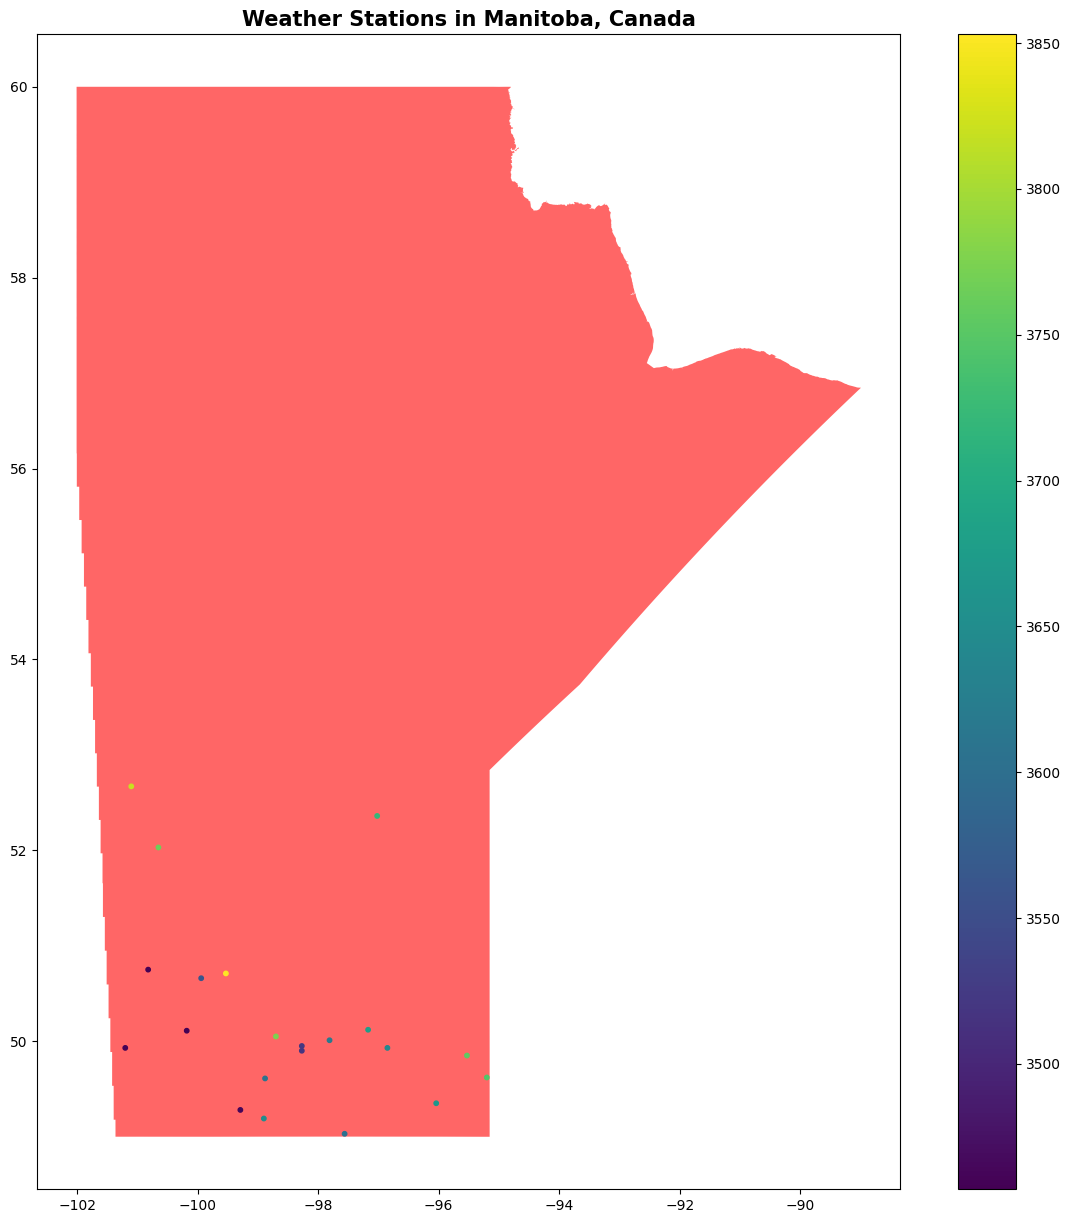

In [42]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
# add .shp mapfile to axes
manitoba_map.plot(ax=ax, alpha=0.6,color='red')


# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize

geo_df.plot(column='Station ID',ax=ax, legend=True,markersize=10)

# # add title to graph
plt.title('Weather Stations in Manitoba, Canada', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
long_min = mn_stn_df['Longitude'].min()
long_max = mn_stn_df['Longitude'].max()
lat_min = mn_stn_df['Latitude'].min()
lat_max = mn_stn_df['Latitude'].max()
print(long_min)
print(long_max)
print(lat_min)
print(lat_max)

# plt.ylim(lat_min,lat_max)
# plt.xlim(long_min,long_max)
# show map
plt.show()

In [43]:
img = plt.imread('Manitoba-Crop-Districts.png')
plt.imshow(img)

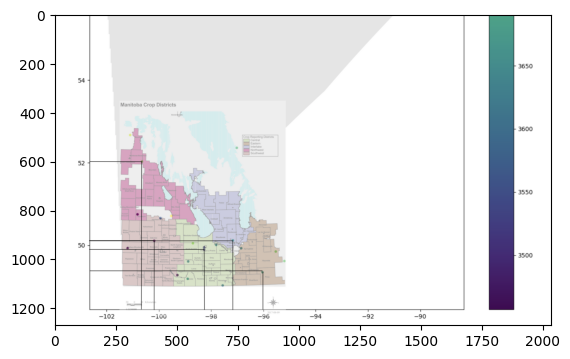

In [44]:
img = plt.imread('main_stations.png')
plt.imshow(img)

In [45]:
import os
os.chdir("3755")

In [46]:
!ls

en_climate_daily_MB_5032360_1988_P1D.csv
en_climate_daily_MB_5032360_1989_P1D.csv
en_climate_daily_MB_5032360_1990_P1D.csv
en_climate_daily_MB_5032360_1991_P1D.csv
en_climate_daily_MB_5032360_1992_P1D.csv
en_climate_daily_MB_5032360_1993_P1D.csv
en_climate_daily_MB_5032360_1994_P1D.csv
en_climate_daily_MB_5032360_1995_P1D.csv
en_climate_daily_MB_5032360_1996_P1D.csv
en_climate_daily_MB_5032360_1997_P1D.csv
en_climate_daily_MB_5032360_1998_P1D.csv
en_climate_daily_MB_5032360_1999_P1D.csv
en_climate_daily_MB_5032360_2000_P1D.csv
en_climate_daily_MB_5032360_2001_P1D.csv
en_climate_daily_MB_5032360_2002_P1D.csv
en_climate_daily_MB_5032360_2003_P1D.csv
en_climate_daily_MB_5032360_2004_P1D.csv
en_climate_daily_MB_5032360_2005_P1D.csv
en_climate_daily_MB_5032360_2006_P1D.csv
en_climate_daily_MB_5032360_2007_P1D.csv
en_climate_daily_MB_5032360_2008_P1D.csv
en_climate_daily_MB_5032360_2009_P1D.csv
en_climate_daily_MB_5032360_2010_P1D.csv
en_climate_daily_MB_5032360_2011_P1D.csv
en_climate_daily

In [47]:
import pandas as pd

final_df_3 = 0
for i in range(1988,2023):
    df = pd.read_csv("en_climate_daily_MB_5032360_"+str(i)+"_P1D.csv")
    df.drop(['Data Quality','Max Temp Flag','Snow on Grnd (cm)','Snow on Grnd Flag',
            'Total Rain Flag','Total Snow Flag','Total Precip Flag','Heat Deg Days Flag','Cool Deg Days Flag',
            'Dir of Max Gust (10s deg)','Dir of Max Gust Flag','Spd of Max Gust (km/h)',
            'Spd of Max Gust Flag','Min Temp Flag','Mean Temp Flag',
            'Heat Deg Days (°C)','Cool Deg Days (°C)',
            'Longitude (x)','Latitude (y)','Station Name','Climate ID','Day','Mean Temp (°C)'],inplace=True,axis=1)
    
    df.drop('Date/Time',axis=1,inplace=True)
    dates = pd.to_datetime(df.Year*10000+df.Month*100+1,format='%Y%m%d')
    df = pd.concat([df,dates], axis=1)
    df = df.rename(columns={0: 'Date'})
    df.drop(['Year','Month'],axis=1,inplace=True)
    df = df.groupby('Date').mean()
    df['Max Temp (°C)'] = df['Max Temp (°C)'].round(2)
    df['Min Temp (°C)'] = df['Min Temp (°C)'].round(2)
    df['Total Rain (mm)'] = df['Total Rain (mm)'].round(2)
    df['Total Snow (cm)'] = df['Total Snow (cm)'].round(2)
    if i==1988:
        final_df_3 = df
    else:
        final_df_3 = pd.concat([final_df_3,df], axis=0)
    
final_df_3

Max Temp (°C)  Min Temp (°C)  Total Rain (mm)  Total Snow (cm)  \
Date                                                                         
1988-01-01         -12.39         -26.81             0.00             0.49   
1988-02-01         -10.18         -26.73             0.00             0.37   
1988-03-01          -0.34         -13.70             0.13             1.31   
1988-04-01          11.43          -4.36             0.09             0.00   
1988-05-01          22.13           6.17             1.82             0.00   
...                   ...            ...              ...              ...   
2022-08-01          24.40           9.50             3.41             0.00   
2022-09-01          21.53           4.31             4.53             0.00   
2022-10-01          12.60          -2.20             0.64             0.38   
2022-11-01           1.60          -8.50             0.00             1.19   
2022-12-01          -9.47         -21.89             0.00             1.47   

            Total Precip (mm)  
Date                           
1988-01-01           0.703226  
1988-02-01           0.372414  
1988-03-01           1.843333  
1988-04-01           0.086667  
1988-05-01           1.819355  
...                       ...  
2022-08-01           3.410000  
2022-09-01           4.533333  
2022-10-01           1.023810  
2022-11-01           1.190476  
2022-12-01           1.470588  

[420 rows x 5 columns]

In [48]:
import os
os.chdir("../3460")

In [49]:
!ls

en_climate_daily_MB_5010QFQ_1988_P1D.csv
en_climate_daily_MB_5010QFQ_1989_P1D.csv
en_climate_daily_MB_5010QFQ_1990_P1D.csv
en_climate_daily_MB_5010QFQ_1991_P1D.csv
en_climate_daily_MB_5010QFQ_1992_P1D.csv
en_climate_daily_MB_5010QFQ_1993_P1D.csv
en_climate_daily_MB_5010QFQ_1994_P1D.csv
en_climate_daily_MB_5010QFQ_1995_P1D.csv
en_climate_daily_MB_5010QFQ_1996_P1D.csv
en_climate_daily_MB_5010QFQ_1997_P1D.csv
en_climate_daily_MB_5010QFQ_1998_P1D.csv
en_climate_daily_MB_5010QFQ_1999_P1D.csv
en_climate_daily_MB_5010QFQ_2000_P1D.csv
en_climate_daily_MB_5010QFQ_2001_P1D.csv
en_climate_daily_MB_5010QFQ_2002_P1D.csv
en_climate_daily_MB_5010QFQ_2003_P1D.csv
en_climate_daily_MB_5010QFQ_2004_P1D.csv
en_climate_daily_MB_5010QFQ_2005_P1D.csv
en_climate_daily_MB_5010QFQ_2006_P1D.csv
en_climate_daily_MB_5010QFQ_2007_P1D.csv
en_climate_daily_MB_5010QFQ_2008_P1D.csv
en_climate_daily_MB_5010QFQ_2009_P1D.csv
en_climate_daily_MB_5010QFQ_2010_P1D.csv
en_climate_daily_MB_5010QFQ_2011_P1D.csv
en_climate_daily

In [51]:
import pandas as pd

final_df_4 = 0
for i in range(1988,2023):
    df = pd.read_csv("en_climate_daily_MB_5010QFQ_"+str(i)+"_P1D.csv")
    df.drop(['Data Quality','Max Temp Flag','Snow on Grnd (cm)','Snow on Grnd Flag',
            'Total Rain Flag','Total Snow Flag','Total Precip Flag','Heat Deg Days Flag','Cool Deg Days Flag',
            'Dir of Max Gust (10s deg)','Dir of Max Gust Flag','Spd of Max Gust (km/h)',
            'Spd of Max Gust Flag','Min Temp Flag','Mean Temp Flag',
            'Heat Deg Days (°C)','Cool Deg Days (°C)',
            'Longitude (x)','Latitude (y)','Station Name','Climate ID','Day','Mean Temp (°C)'],inplace=True,axis=1)
    
    df.drop('Date/Time',axis=1,inplace=True)
    dates = pd.to_datetime(df.Year*10000+df.Month*100+1,format='%Y%m%d')
    df = pd.concat([df,dates], axis=1)
    df = df.rename(columns={0: 'Date'})
    df.drop(['Year','Month'],axis=1,inplace=True)
    df = df.groupby('Date').mean()
    df['Max Temp (°C)'] = df['Max Temp (°C)'].round(2)
    df['Min Temp (°C)'] = df['Min Temp (°C)'].round(2)
    df['Total Rain (mm)'] = df['Total Rain (mm)'].round(2)
    df['Total Snow (cm)'] = df['Total Snow (cm)'].round(2)
    if i==1988:
        final_df_4 = df
    else:
        final_df_4 = pd.concat([final_df_4,df], axis=0)
    
final_df_4

Max Temp (°C)  Min Temp (°C)  Total Rain (mm)  Total Snow (cm)  \
Date                                                                         
1988-01-01            NaN            NaN             0.00             0.34   
1988-02-01            NaN            NaN             0.00             0.12   
1988-03-01            NaN            NaN             0.67             0.68   
1988-04-01            NaN            NaN             0.77             0.01   
1988-05-01            NaN            NaN             3.21             0.00   
...                   ...            ...              ...              ...   
2022-08-01          26.70          13.04             0.99             0.00   
2022-09-01          21.31           7.24             1.16             0.00   
2022-10-01          12.56          -0.13             0.18             0.07   
2022-11-01          -2.04         -10.84             0.03             0.73   
2022-12-01         -12.68         -20.67             0.01             1.35   

            Total Precip (mm)  
Date                           
1988-01-01           0.335484  
1988-02-01           0.117241  
1988-03-01           1.345161  
1988-04-01           0.780000  
1988-05-01           3.206452  
...                       ...  
2022-08-01           0.992593  
2022-09-01           1.162963  
2022-10-01           0.251852  
2022-11-01           0.760000  
2022-12-01           1.360000  

[420 rows x 5 columns]

In [53]:
os.chdir("../")
folder = 'clean/'
final_df.to_csv(folder+'weather_north.csv')
final_df_2.to_csv(folder+'weather_centeral.csv')
final_df_3.to_csv(folder+'weather_east.csv')
final_df_4.to_csv(folder+'weather_west.csv')

In [54]:
!ls

3457                         Manitoba_Provincial_Boundary
3460                         Station Inventory EN.csv
3518                         Weather.ipynb
3605                         areas-canada
3649                         canada-historical-stocks.csv
3667                         clean
3678                         historical cpi.csv
3755                         main_stations.png
3766                         weather.py
Manitoba-Crop-Districts.png  weather_stations_map.png
